In [58]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.style.use('../stylefiles/socib.mplstyle')

In [59]:
datafile = ("http://thredds.priv.socib.es/thredds/dodsC/satellite/ocean_temperature/"
            "jpl/sst/L4/2016/08/20160804-JPL-L4UHfnd-GLOB-v01-fv04-MUR.nc")

In [69]:
with netCDF4.Dataset(datafile) as nc:
    sst = nc.variables['analysed_sst']
    offset = sst.add_offset
    scale = sst.scale_factor
    sst.set_auto_scale(False)
    sst_packed = sst[:]
    valid_min_packed = sst.valid_min
    valid_max_packed = sst.valid_max
    sst.set_auto_scale(True)
    sst_unpacked = sst[:]
    valid_min_unpacked = sst.valid_min * scale + offset
    valid_max_unpacked = sst.valid_max * scale + offset

In [70]:
sst_unpacked = np.ma.masked_where((sst_packed > valid_max_unpacked) | 
                                  (sst_packed < valid_min_unpacked), 
                                   sst_unpacked)

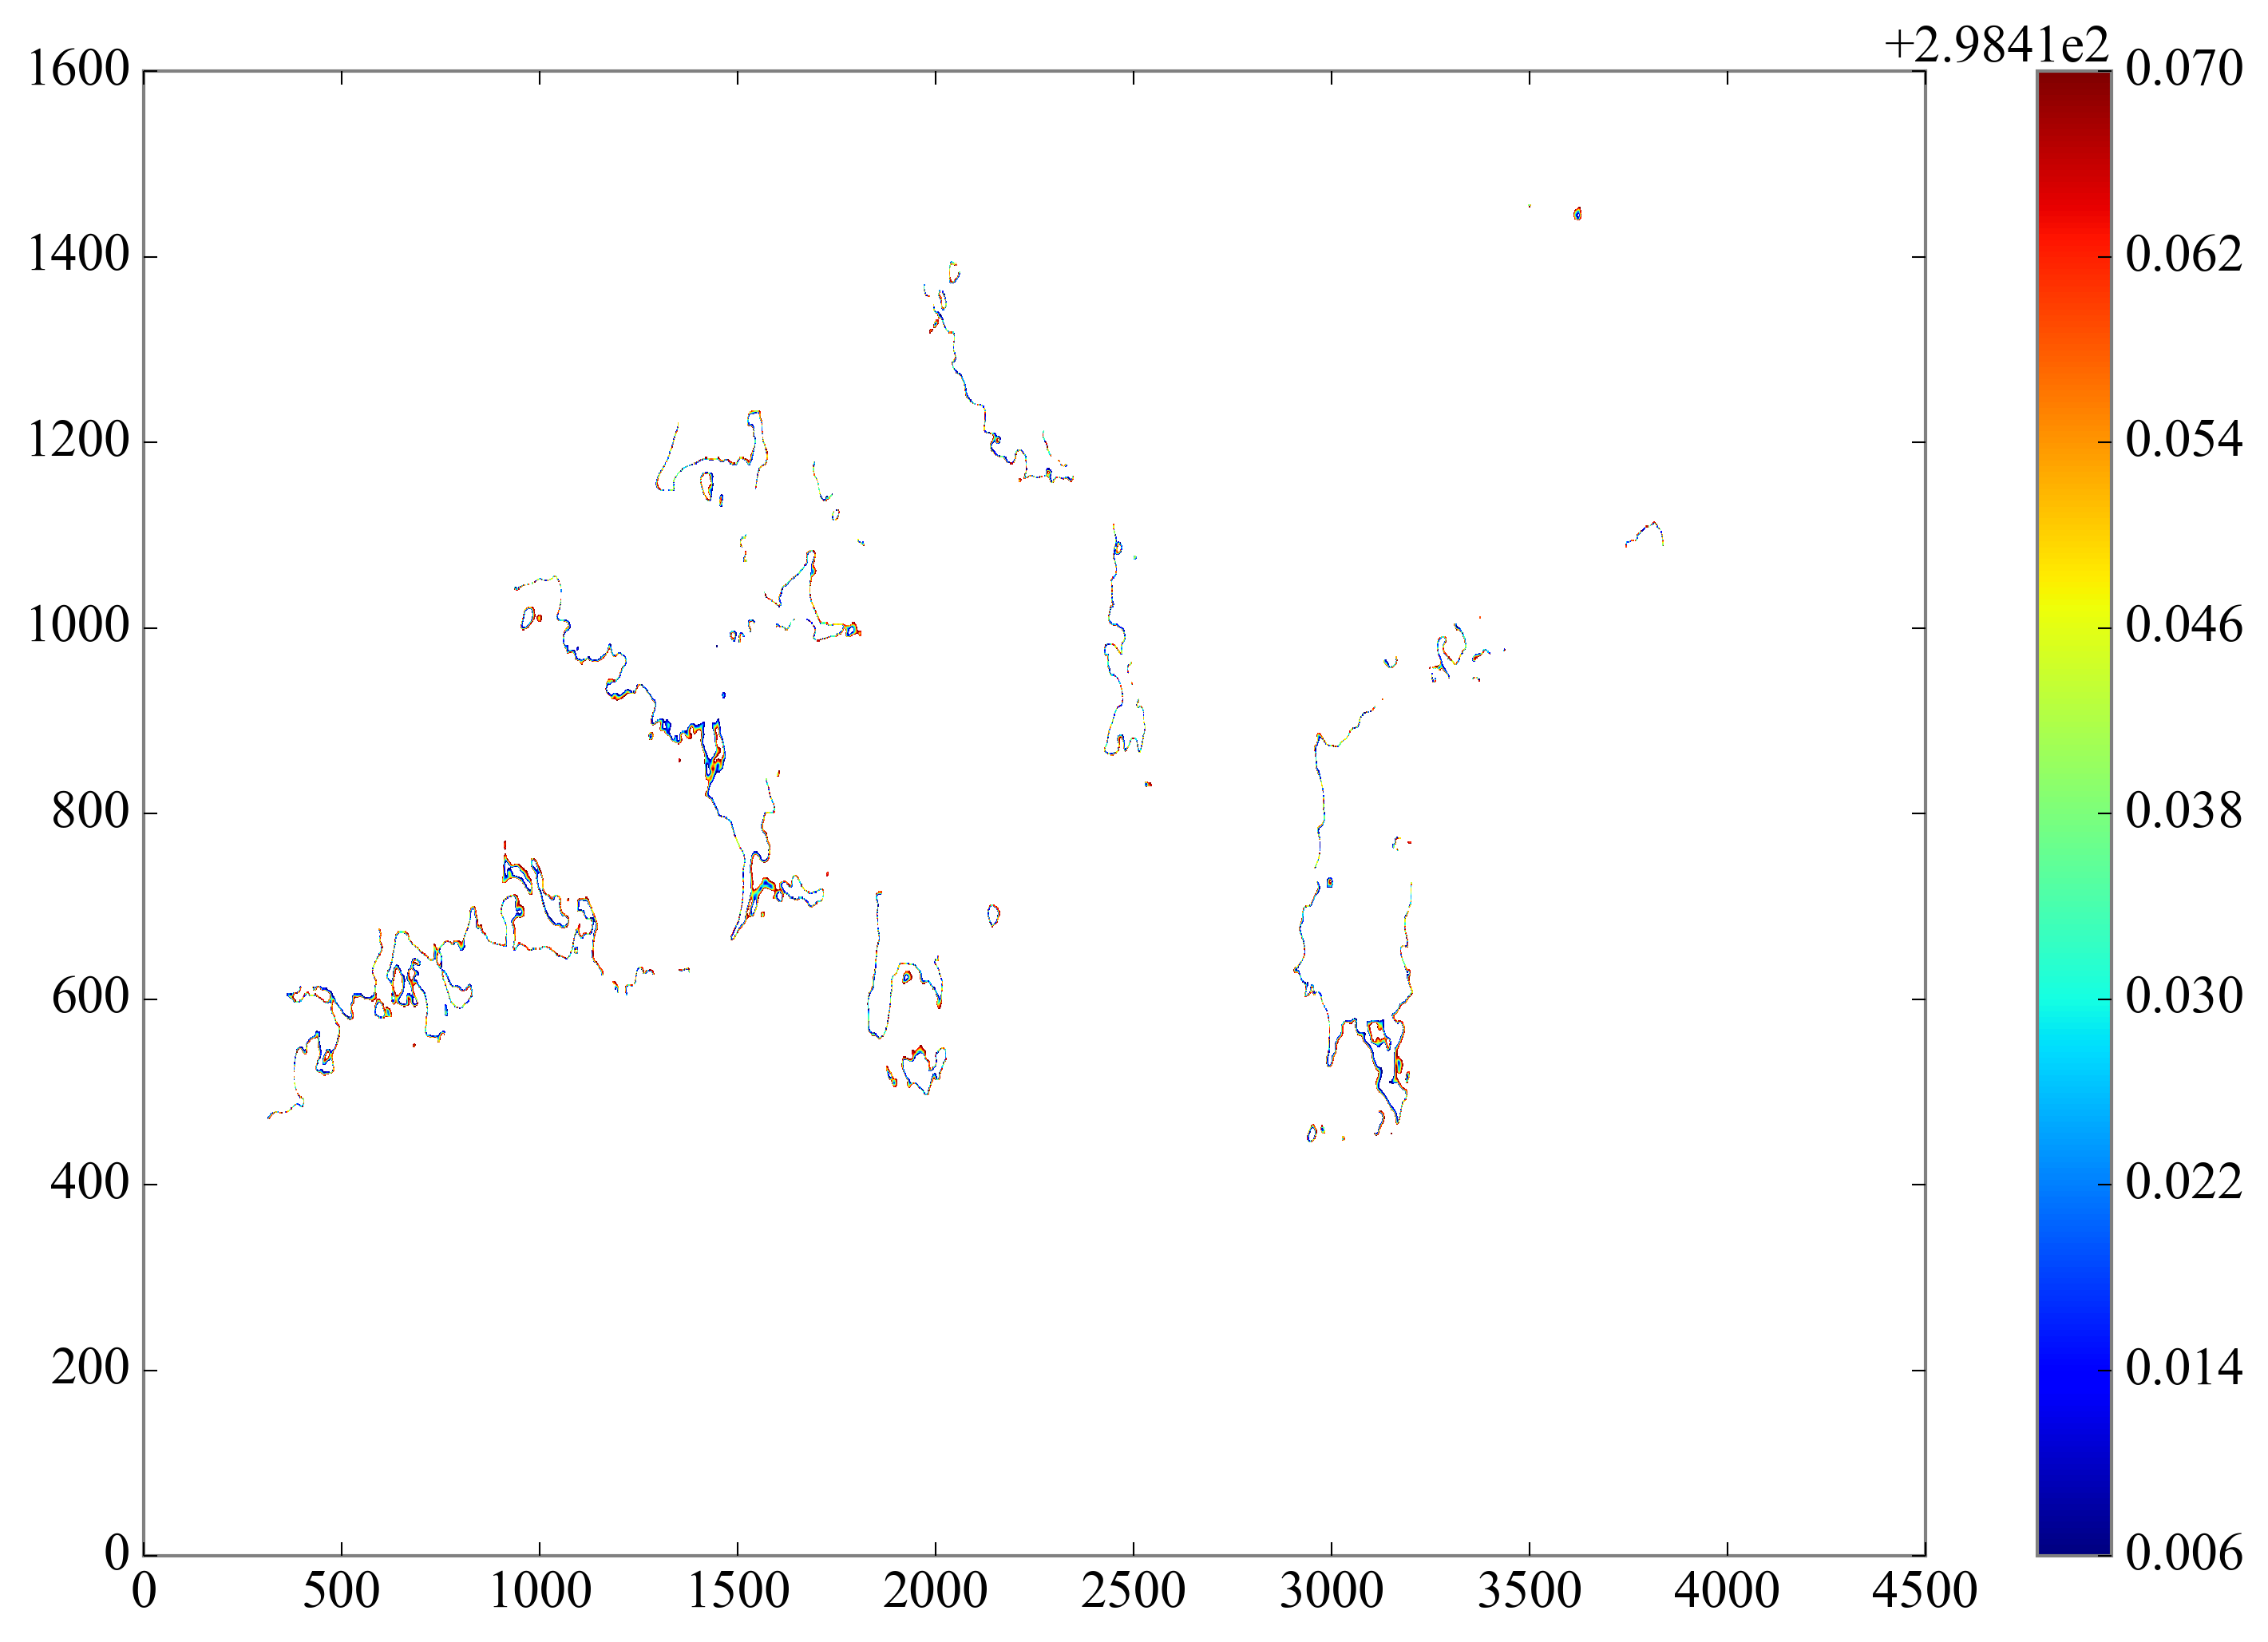

In [71]:
plt.pcolor(sst_unpacked.squeeze())
plt.colorbar()
plt.show()

In [72]:
valid_min_unpacked

265.38299999999998

In [73]:
valid_max_unpacked

330.91699999999997

In [74]:
valid_min_packed

-32767

In [75]:
valid_max_packed

32767

In [76]:
scale

0.001